## Membuat Loop Pelatihan Kustom di TensorFlow

### Rekap: model.kompilasi dan model.fit

Di TensorFlow dan Keras, Anda biasanya mengonfigurasi model menggunakan `model.compile` dan melatihnya dengan `model.fit`. Di dalam `model.compile`, Anda menentukan fungsi pengoptimal dan kerugian. Kemudian, `model.fit` mengulangi data pelatihan (zaman) dan memperbarui bobot untuk meminimalkan kerugian.

### Membangun Lingkaran Pelatihan Kita Sendiri

Mari buat loop pelatihan khusus untuk memahami proses pelatihan dengan lebih baik. Kami akan menangani kumpulan data, menghitung dan meminimalkan kerugian, dan memperbarui bobot secara manual menggunakan pengoptimal.

**Tangga:**

1. **Tentukan Model Jaringan** (kita akan mulai dengan model neuron tunggal sederhana)
 - Membuat kelas bernama `Model` (tidak mewarisi kelas TensorFlow)
 - Inisialisasi bobot yang dapat dilatih (`w` dan `b`) di konstruktor
 - Menerapkan fungsi `panggilan` yang mendefinisikan persamaan linier: `w * x + b`

2. **Menyiapkan Data Pelatihan**
 - Gunakan data sintetis dalam contoh ini
 - Hasilkan nilai `x` acak dan hitung nilai `y` yang sesuai berdasarkan bobot sebenarnya yang diinginkan (`w` dan `b`)

3. **Menentukan Fungsi Kerugian dan Pengoptimal**
 - Membuat fungsi untuk menghitung kerugian (misalnya, kesalahan kuadrat rata-rata) dan memperbarui bobot (misalnya, penurunan gradien)

4. **Lingkaran Latihan**
 - Iterasi selama beberapa zaman:
 - Untuk setiap zaman:
 - Acak data pelatihan (opsional)
 - Bagi data menjadi beberapa batch
 - Untuk setiap kelompok:
 - Hitung prediksi
 - Hitung kerugian
 - Perbarui bobot menggunakan pengoptimal dan gradien

5. **Validasi Model**
 - Uji model pada data yang tidak terlihat

**Langkah Selanjutnya:**

Di bagian berikut, kami akan mengkodekan langkah-langkah ini untuk membuat loop pelatihan kustom yang berfungsi di TensorFlow!

# **Fungsi Loss: Mean Squared Error dan Proses Optimisasi**

## **1. Mean Squared Error Loss**
Mean Squared Error (MSE) adalah rata-rata dari kuadrat selisih antara nilai aktual (`y_true`) dan nilai prediksi (`y_pred`).  
Berikut adalah implementasi sederhana untuk menghitung MSE menggunakan TensorFlow:

```python
import tensorflow as tf

def mean_squared_error(y_true, y_pred):
    # Menghitung Mean Squared Error
    error = y_true - y_pred
    mse = tf.reduce_mean(tf.square(error))
    return mse
```

2. Proses Optimisasi dengan Gradien
a. Gradien dan Derivatif
Gradien memberikan arah untuk meminimalkan nilai loss.
Langkah-langkah:

Hitung loss menggunakan fungsi MSE.
Gunakan gradient tape untuk menghitung gradien terhadap parameter model.
Perbarui parameter model (W dan B) menggunakan gradien yang telah dihitung.
b. Implementasi dalam Kode
Berikut adalah contoh bagaimana optimisasi dilakukan:

# Contoh parameter awal
```python
W = tf.Variable(0.5)  # Bobot
B = tf.Variable(1.0)  # Bias
learning_rate = 0.1

# Data dummy
y_true = tf.constant([1.0, 2.0, 3.0])  # Nilai sebenarnya
y_pred = W * tf.constant([1.0, 2.0, 3.0]) + B  # Prediksi awal

# Gradient Descent menggunakan GradientTape
with tf.GradientTape() as tape:
    loss = mean_squared_error(y_true, y_pred)

# Hitung gradien
grads = tape.gradient(loss, [W, B])
dW, dB = grads  # Gradien untuk W dan B

# Perbarui parameter
W.assign_sub(learning_rate * dW)
B.assign_sub(learning_rate * dB)

print(f"Updated W: {W.numpy()}, Updated B: {B.numpy()}")
```

3. Penjelasan tentang Learning Rate
Learning Rate menentukan seberapa besar langkah setiap update parameter.
Jika terlalu besar, langkah bisa berosilasi atau melewati minimum.
Jika terlalu kecil, proses konvergensi menjadi sangat lambat.

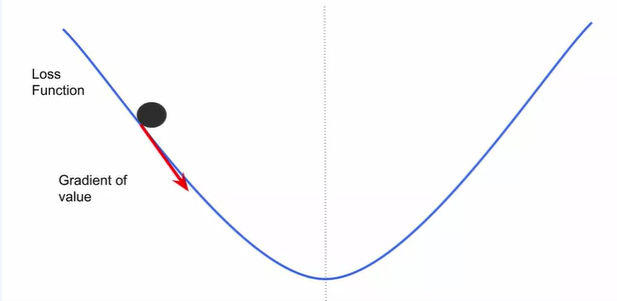

4. Visualisasi Loss Function
Fungsi loss Mean Squared Error berbentuk parabola dengan minimum di dasar kurva. Gradien digunakan untuk menemukan arah menuju minimum tersebut.
```python
import numpy as np
import matplotlib.pyplot as plt

# Contoh visualisasi fungsi loss
x = np.linspace(-3, 3, 100)
y = x**2

plt.plot(x, y, label="Loss Function")
plt.scatter([0], [0], color='red', label="Minimum")
plt.xlabel("Parameter")
plt.ylabel("Loss")
plt.title("Visualisasi Loss Function")
plt.legend()
plt.show()
```

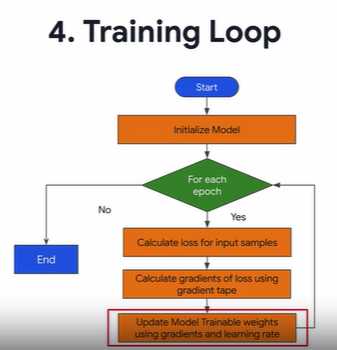

# 🚀 **Training Loop dengan Flowchart dan Penjelasan**

Proses training model melibatkan langkah-langkah berikut:

## 🧩 **Langkah-langkah Training Loop**
1. **Inisialisasi Model**  
   - Inisialisasi **model** beserta **trainable variables** seperti **weights** (*W*) dan **biases** (*B*).
   
2. **Iterasi untuk Setiap Epoch**  
   - Jalankan training selama jumlah **Epochs** yang diinginkan. Di dalam setiap **Epoch**:
     - **Hitung Loss**: Bandingkan prediksi model dengan nilai aktual untuk mendapatkan **loss**.
     - **Hitung Gradients**: Gunakan **gradient tape** untuk menghitung turunan **loss** terhadap setiap **trainable variable**.
     - **Perbarui Trainable Variables**: Terapkan pembaruan dengan mengurangi gradient yang telah diskalakan dengan **learning rate**.

3. **Visualisasi dan Evaluasi**  
   - Plot perubahan nilai **weights** (*W*) dan **biases** (*B*) serta perubahan nilai **loss** selama training.
   - Hitung **final loss** setelah training selesai.

---

## 📊 **Visualisasi Perubahan Nilai**
- **Plot 1**: Perubahan nilai **W** dan **B** terhadap **loss**.
  - Nilai **W** dan **B** bergerak menuju **minimum loss** seperti bola yang menggelinding di lereng kurva.
- **Plot 2**: Konvergensi **W** dan **B**.
  - Lengkung merah (**W**) dan biru (**B**) mendekati garis horizontal putus-putus yang mewakili nilai sebenarnya.
- **Plot 3**: Perilaku model selama 15 **Epochs**.
  - **Loss** awalnya besar (1.9) dan menurun hingga mendekati minimum (0.00529) pada Epoch ke-15.

---

📝 Catatan Tambahan

Gunakan GradientTape untuk mengelola perhitungan turunan otomatis.
Learning Rate memengaruhi kecepatan konvergensi. Eksperimen dengan nilai yang berbeda jika diperlukan.
Hasil visualisasi membantu memahami bagaimana W, B, dan loss berubah seiring waktu.